In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/Merged_Dataset.csv"
df = pd.read_csv(file_path)

# Display basic information
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42299 entries, 0 to 42298
Data columns (total 77 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow Duration               42299 non-null  int64  
 1   Total Fwd Packet            42299 non-null  int64  
 2   Total Bwd packets           42299 non-null  int64  
 3   Total Length of Fwd Packet  42299 non-null  float64
 4   Total Length of Bwd Packet  42299 non-null  float64
 5   Fwd Packet Length Max       42299 non-null  float64
 6   Fwd Packet Length Min       42299 non-null  float64
 7   Fwd Packet Length Mean      42299 non-null  float64
 8   Fwd Packet Length Std       42299 non-null  float64
 9   Bwd Packet Length Max       42299 non-null  float64
 10  Bwd Packet Length Min       42299 non-null  float64
 11  Bwd Packet Length Mean      42299 non-null  float64
 12  Bwd Packet Length Std       42299 non-null  float64
 13  Flow Bytes/s                422

(None,
    Flow Duration  Total Fwd Packet  Total Bwd packets  \
 0         214392                 9                 21   
 1        2376792                 9                  3   
 2         131350                10                  3   
 3         164796                 6                  3   
 4         163418                 6                  3   
 
    Total Length of Fwd Packet  Total Length of Bwd Packet  \
 0                       388.0                     24564.0   
 1                       752.0                         0.0   
 2                      7564.0                         0.0   
 3                       770.0                         0.0   
 4                       400.0                         0.0   
 
    Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
 0                  194.0                    0.0               43.111111   
 1                  188.0                    0.0               83.555556   
 2                 1460.0                

In [ ]:
# Check the distribution of the Label column
label_counts = df['Label'].value_counts()
label_counts_percentage = df['Label'].value_counts(normalize=True) * 100

# Combine both counts and percentages for better insight
label_distribution = pd.DataFrame({'Count': label_counts, 'Percentage': label_counts_percentage})
label_distribution


,Count,Percentage
Label,,
0.0,28063,66.345927
5.0,5511,13.028985
4.0,4500,10.638801
7.0,2428,5.740224
6.0,669,1.581635
3.0,668,1.579271
8.0,304,0.718710
2.0,64,0.151307
1.0,54,0.127666


<ipython-input-4-449da29c20be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_distribution.index, y=label_distribution["Count"], palette="viridis")


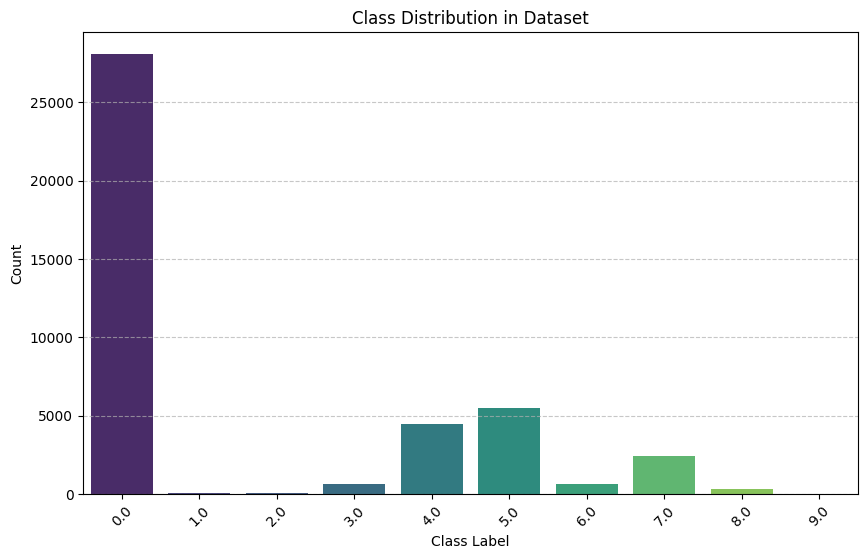

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10, 6))
sns.barplot(x=label_distribution.index, y=label_distribution["Count"], palette="viridis")

# Add labels and title
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Class Distribution in Dataset")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [ ]:
df = df.dropna(subset=['Label'])  # Remove rows where 'Label' is NaN

In [ ]:
!pip install smote-variants

In [ ]:
import smote_variants as sv
from collections import Counter

# Drop NaN values in target
df = df.dropna(subset=['Label'])

# Extract features and labels
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Target

# Check original class distribution
print("Original class distribution:", Counter(y))

# ✅ Apply SMOTE-PSO-BAT
smote_psobat = sv.SMOTE_PSOBAT()
X_resampled_psobat, y_resampled_psobat = smote_psobat.sample(X.values, y.values)

# Check new class distribution
print("Balanced dataset class distribution:", Counter(y_resampled_psobat))


2025-02-20 18:42:47,256:INFO:SMOTE_PSOBAT: Running sampling via ('SMOTE_PSOBAT', "{'maxit': 50, 'c1': 0.3, 'c2': 0.1, 'c3': 0.1, 'alpha': 0.9, 'gamma': 0.9, 'method': 'bat', 'nn_params': {}, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': None}, 'n_jobs': 1, 'random_state': None, 'class_name': 'SMOTE_PSOBAT'}")
INFO:smote_variants:SMOTE_PSOBAT: Running sampling via ('SMOTE_PSOBAT', "{'maxit': 50, 'c1': 0.3, 'c2': 0.1, 'c3': 0.1, 'alpha': 0.9, 'gamma': 0.9, 'method': 'bat', 'nn_params': {}, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': None}, 'n_jobs': 1, 'random_state': None, 'class_name': 'SMOTE_PSOBAT'}")
2025-02-20 18:42:47,263:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.29503416355925405, 'n_neighbors': 6, 'nn_params': {'metric_tensor': None}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_samp

Original class distribution: Counter({0.0: 28063, 5.0: 5511, 4.0: 4500, 7.0: 2428, 6.0: 669, 3.0: 668, 8.0: 304, 2.0: 64, 1.0: 54, 9.0: 37})


2025-02-20 18:42:58,321:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.0, 'n_neighbors': 1, 'nn_params': {'metric_tensor': None}, 'n_jobs': 1, 'ss_params': {'n_dim': 1, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
INFO:smote_variants:SMOTE: Running sampling via ('SMOTE', "{'proportion': 2.0, 'n_neighbors': 1, 'nn_params': {'metric_tensor': None}, 'n_jobs': 1, 'ss_params': {'n_dim': 1, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2025-02-20 18:42:58,327:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2025-02-20 18:42:58,330:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2025-02

Balanced dataset class distribution: Counter({1.0: 56072, 0.0: 28063, 5.0: 5511, 4.0: 4500, 7.0: 2428, 6.0: 669, 3.0: 668, 8.0: 304, 2.0: 64, 9.0: 37})


In [ ]:
import pandas as pd

# Create a new DataFrame with balanced data
balanced_df = pd.DataFrame(X_resampled_psobat, columns=X.columns)
balanced_df['Label'] = y_resampled_psobat  # Add the target column

# Save to CSV
balanced_df.to_csv('Balanced_Dataset.csv', index=False)

print("Balanced dataset saved successfully!")


Balanced dataset saved successfully!


In [ ]:
from google.colab import files
files.download('Balanced_Dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

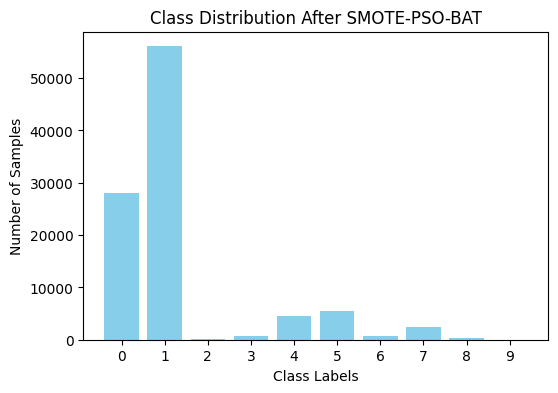

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Check new class distribution after SMOTE-PSO-BAT
psobat_distribution = Counter(y_resampled_psobat)

# Plot the class distribution
plt.figure(figsize=(6,4))
plt.bar(psobat_distribution.keys(), psobat_distribution.values(), color='skyblue')
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Class Distribution After SMOTE-PSO-BAT")
plt.xticks(list(psobat_distribution.keys()))
plt.show()


2025-02-20 19:52:04,472:INFO:SMOTE_PSOBAT: Running sampling via ('SMOTE_PSOBAT', "{'maxit': 50, 'c1': 0.3, 'c2': 0.1, 'c3': 0.1, 'alpha': 0.9, 'gamma': 0.9, 'method': 'bat', 'nn_params': {}, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': None}, 'n_jobs': 1, 'random_state': None, 'class_name': 'SMOTE_PSOBAT'}")
INFO:smote_variants:SMOTE_PSOBAT: Running sampling via ('SMOTE_PSOBAT', "{'maxit': 50, 'c1': 0.3, 'c2': 0.1, 'c3': 0.1, 'alpha': 0.9, 'gamma': 0.9, 'method': 'bat', 'nn_params': {}, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': None}, 'n_jobs': 1, 'random_state': None, 'class_name': 'SMOTE_PSOBAT'}")
2025-02-20 19:52:04,477:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.4744695072259686, 'n_neighbors': 1, 'nn_params': {'metric_tensor': None}, 'n_jobs': 1, 'ss_params': {'n_dim': 1, 'simplex_sampling': 'random', 'within_simplex_sampl

New class distribution after SMOTE-PSO-BAT: Counter({1.0: 56072, 0.0: 28063, 5.0: 5511, 4.0: 4500, 7.0: 2428, 6.0: 669, 3.0: 668, 8.0: 304, 2.0: 64, 9.0: 37})


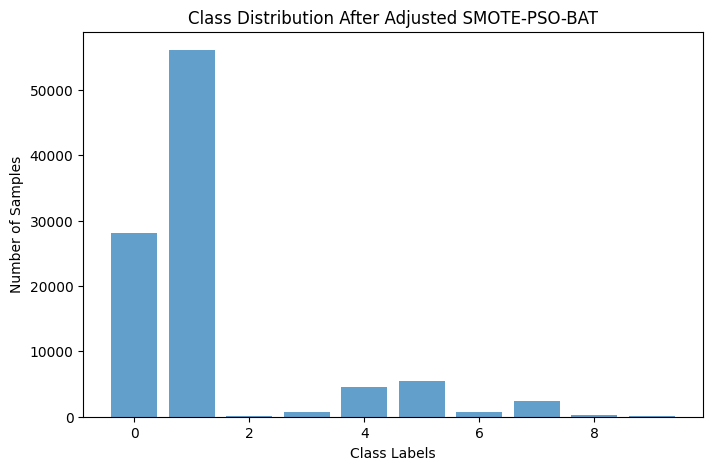

In [ ]:
import smote_variants as sv
from collections import Counter
import matplotlib.pyplot as plt

# Apply SMOTE-PSO-BAT with a defined proportion
smote_psobat = sv.SMOTE_PSOBAT(proportion=0.8)  # Adjust this value as needed
X_resampled_psobat, y_resampled_psobat = smote_psobat.sample(X.values, y.values)

# Check new class distribution
new_distribution = Counter(y_resampled_psobat)
print("New class distribution after SMOTE-PSO-BAT:", new_distribution)

# Plot the new distribution
plt.figure(figsize=(8,5))
plt.bar(new_distribution.keys(), new_distribution.values(), alpha=0.7)
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Class Distribution After Adjusted SMOTE-PSO-BAT")
plt.show()


In [ ]:
!pip install mealpy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 50.3 MB/s eta 0:00:00


In [ ]:
!pip install mealpy


In [ ]:
import numpy as np
import pandas as pd
from mealpy.swarm_based.GWO import OriginalGWO
from mealpy.utils.problem import Problem
from mealpy.utils.space import BoolVar
from sklearn.feature_selection import mutual_info_classif

# Convert dataset to DataFrame if needed
X_balanced = pd.DataFrame(X_resampled_psobat)
y_balanced = pd.Series(y_resampled_psobat)

# ✅ Custom Problem class implementing `obj_func()`
class FeatureSelectionProblem(Problem):
    def __init__(self):
        bounds = [BoolVar() for _ in range(X_balanced.shape[1])]  # Binary selection for features
        super().__init__(bounds=bounds, minmax="min", log_to=None)

    def obj_func(self, solution):
        selected_indices = [i for i in range(len(solution)) if solution[i] > 0.5]
        if len(selected_indices) == 0:
            return 1e6  # Avoid empty selection

        # Compute mutual information score as a feature importance measure
        score = np.mean(mutual_info_classif(X_balanced.iloc[:, selected_indices], y_balanced))
        return -score  # Negative because we minimize in GWO

# ✅ Define the problem
problem = FeatureSelectionProblem()

# ✅ Initialize GWO WITHOUT passing `problem`
gwo = OriginalGWO(epoch=50, pop_size=10)

# ✅ Solve the problem using `.solve(problem)`
best_position, best_fitness = gwo.solve(problem)

# Select the best features
selected_features = [i for i in range(len(best_position)) if best_position[i] > 0.5]
X_selected = X_balanced.iloc[:, selected_features]  # Filter selected features

# Save the final dataset
final_df = X_selected.copy()
final_df['Label'] = y_balanced  # Add label column back

# Save to CSV
final_df.to_csv("selected_features.csv", index=False)

print("Feature selection completed. Dataset saved as 'selected_features.csv'.")


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter

# Step 1: Load dataset (Update path accordingly)
file_path = "/content/drive/MyDrive/Merged_Dataset.csv"  # Change this path
df = pd.read_csv(file_path)

# Step 2: Handle NaN values in the dataset
df = df.dropna()  # Removes rows with NaN values
print("Dataset shape after dropping NaNs:", df.shape)

# Step 3: Define features (X) and target (y)
X = df.iloc[:, :-1]  # All columns except the last one (features)
y = df.iloc[:, -1]   # Last column (target variable)

# Print original class distribution
print("Original class distribution:", Counter(y))

# Step 4: Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Step 5: Apply RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_balanced, y_balanced = ros.fit_resample(X_smote, y_smote)

# Step 6: Print new class distribution
print("Class distribution after SMOTE + RandomOverSampler:", Counter(y_balanced))

# Step 7: Save balanced dataset
balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df['Label'] = y_balanced  # Add the target column back

balanced_file_path = "/content/balanced_dataset.csv"
balanced_df.to_csv(balanced_file_path, index=False)

print("Balanced dataset saved at:", balanced_file_path)


Dataset shape after dropping NaNs: (42298, 77)
Original class distribution: Counter({0.0: 28063, 5.0: 5511, 4.0: 4500, 7.0: 2428, 6.0: 669, 3.0: 668, 8.0: 304, 2.0: 64, 1.0: 54, 9.0: 37})
Class distribution after SMOTE + RandomOverSampler: Counter({4.0: 28063, 7.0: 28063, 3.0: 28063, 6.0: 28063, 0.0: 28063, 8.0: 28063, 5.0: 28063, 9.0: 28063, 2.0: 28063, 1.0: 28063})
Balanced dataset saved at: /content/balanced_dataset.csv


Final class distribution after SMOTE + RandomOverSampler: Counter({4.0: 28063, 7.0: 28063, 3.0: 28063, 6.0: 28063, 0.0: 28063, 8.0: 28063, 5.0: 28063, 9.0: 28063, 2.0: 28063, 1.0: 28063})


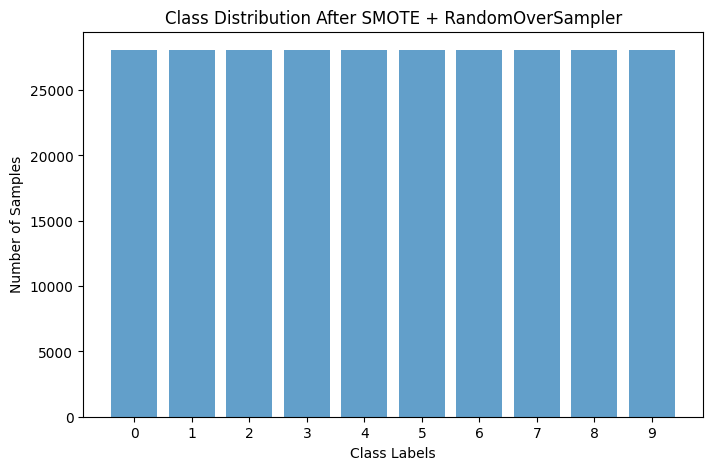

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Print class distribution
print("Final class distribution after SMOTE + RandomOverSampler:", Counter(y_balanced))

# Plot the class distribution
plt.figure(figsize=(8, 5))
plt.bar(Counter(y_balanced).keys(), Counter(y_balanced).values(), alpha=0.7)
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Class Distribution After SMOTE + RandomOverSampler")
plt.xticks(list(Counter(y_balanced).keys()))  # Show all class labels
plt.show()


In [ ]:
!pip install mealpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 48.1 MB/s eta 0:00:00


In [ ]:
!pip install mealpy imbalanced-learn pandas numpy scikit-learn

In [ ]:
!pip install -U mealpy


In [ ]:
!pip install -U mealpy

In [ ]:
!pip install -U pyswarms imbalanced-learn scikit-learn pandas numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 79.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
numba 0.61.0 requires numpy<2.2,

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 🔹 Load Dataset (Update the Path)
dataset_path = "/content/balanced_dataset.csv"  # Change to your actual file path
df = pd.read_csv(dataset_path)

# 🔹 Split features and labels
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target variable

# 🔹 Standardize dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 🔹 Define Fitness Function (Mutual Information)
def fitness_function(selected_features):
    selected_features = np.array(selected_features, dtype=bool)
    if np.sum(selected_features) == 0:
        return float('inf')  # Avoid zero features case

    X_selected = X[:, selected_features]
    score = mutual_info_classif(X_selected, y, random_state=42).mean()

    return -score  # Minimize the negative score

# 🔹 Dragonfly Algorithm Implementation
class DragonflyOptimization:
    def __init__(self, dim, population_size=20, iterations=50, a=0.1, c=0.1, s=0.1, f=0.1, e=0.1, w=0.9):
        self.dim = dim
        self.population_size = population_size
        self.iterations = iterations
        self.a = a  # Alignment
        self.c = c  # Cohesion
        self.s = s  # Separation
        self.f = f  # Food attraction
        self.e = e  # Enemy distraction
        self.w = w  # Inertia weight

        # Initialize population randomly (0 or 1 for feature selection)
        self.population = np.random.randint(2, size=(self.population_size, self.dim))
        self.velocities = np.zeros((self.population_size, self.dim))

    def optimize(self):
        best_position = None
        best_score = float('inf')

        for iter in range(self.iterations):
            scores = np.array([fitness_function(ind) for ind in self.population])
            best_idx = np.argmin(scores)

            # Update global best
            if scores[best_idx] < best_score:
                best_score = scores[best_idx]
                best_position = self.population[best_idx].copy()

            # Compute social behaviors
            for i in range(self.population_size):
                if np.random.rand() < self.w:  # Inertia
                    self.velocities[i] = self.w * self.velocities[i]

                # Compute dragonfly movements
                align = np.mean(self.population, axis=0) - self.population[i]  # Alignment
                cohesion = best_position - self.population[i]  # Cohesion
                separation = -self.population[i]  # Separation

                # Update velocity
                self.velocities[i] += (self.a * align + self.c * cohesion + self.s * separation)

                # Apply food & enemy effect
                if np.random.rand() < 0.5:
                    self.velocities[i] += self.f * (best_position - self.population[i])
                else:
                    self.velocities[i] -= self.e * (best_position - self.population[i])

                # Update position using sigmoid activation
                prob = 1 / (1 + np.exp(-self.velocities[i]))  # Sigmoid function
                self.population[i] = np.where(prob > np.random.rand(self.dim), 1, 0)

        return best_position, best_score

# 🔹 Run Dragonfly Optimization
dim = X.shape[1]  # Number of features
dragonfly_optimizer = DragonflyOptimization(dim, population_size=20, iterations=50)
best_position, best_score = dragonfly_optimizer.optimize()

# 🔹 Extract Selected Features
selected_features = np.array(best_position, dtype=bool)
X_selected = X[:, selected_features]

# 🔹 Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 🔹 Print Results
print("Number of Selected Features:", np.sum(selected_features))
print("Selected Feature Indices:", np.where(selected_features)[0])
print("Shape of Final Dataset:", X_selected.shape)
